In [1]:
import numpy as np
import pandas as pd
import series as s
from constants import *
from phe import *
from animated_map import get_map, Map

In [2]:
def plot_quantiles(map_, ymax=None, height=5, percentiles=(0, 0.25, 0.5, 0.75, 0.95, 1)):
    data = map_.data[0].reset_index()
    unstacked = data[[date_col, metric]].groupby(date_col).quantile(percentiles).unstack()
    unstacked.columns = unstacked.columns.droplevel()
    unstacked.columns.name = 'percentile'
    unstacked.plot(figsize=(14, height), grid=True, 
                   title=f'{map_.area_type.upper()} {map_.axis_label()}', ylim=(0, ymax))

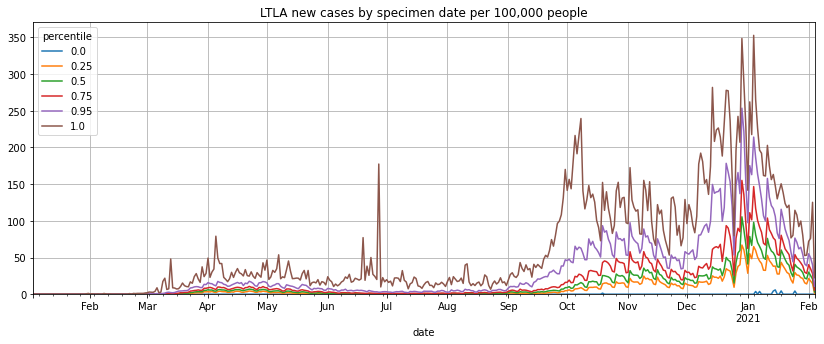

In [3]:
plot_quantiles(Map(s.new_cases).for_area_type(ltla))

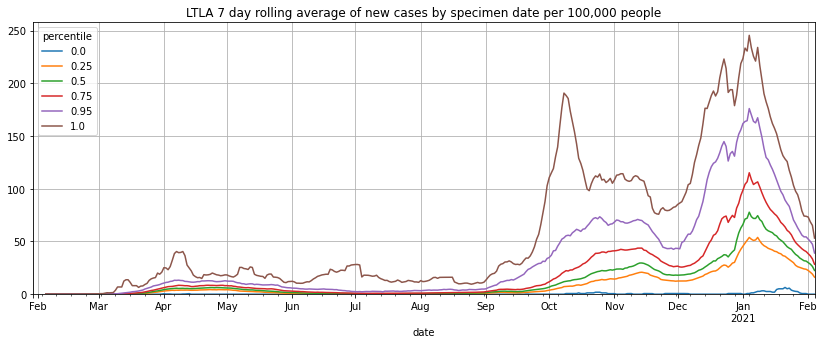

In [4]:
plot_quantiles(Map(s.new_cases, rolling_days=7).for_area_type(ltla))

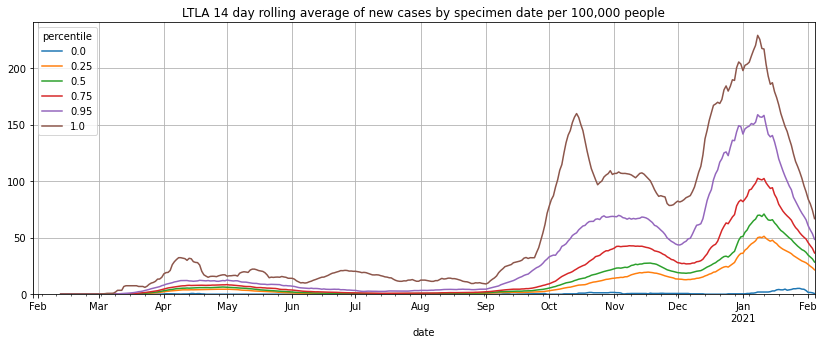

In [5]:
plot_quantiles(get_map(ltla, 'cases'))

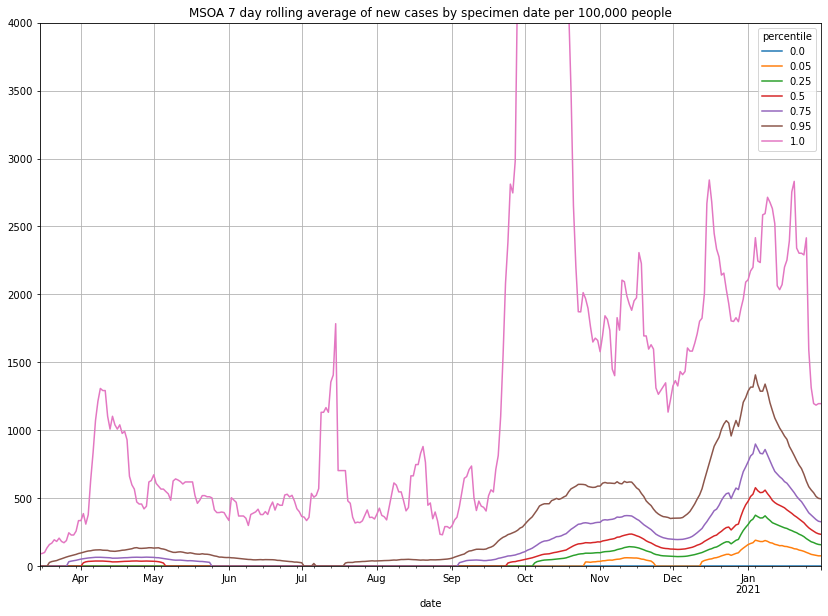

In [6]:
plot_quantiles(get_map(msoa, 'cases'), ymax=4000, height=10, percentiles=(0, 0.05, 0.25, 0.5, 0.75, 0.95, 1))

In [7]:
newCasesBySpecimenDateRollingRate = get_map(msoa, 'cases').data[0][metric]

In [8]:
newCasesBySpecimenDateRollingRate.count()

2193493

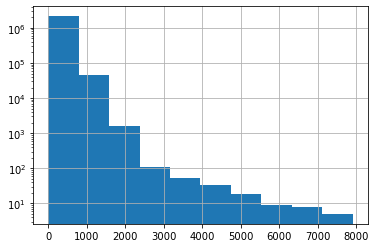

In [9]:
newCasesBySpecimenDateRollingRate.hist(log=True)

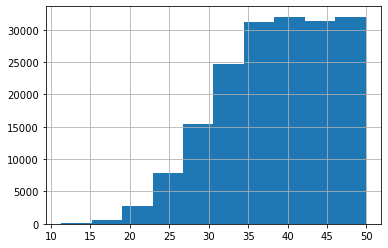

In [10]:
newCasesBySpecimenDateRollingRate[(newCasesBySpecimenDateRollingRate>0) & (newCasesBySpecimenDateRollingRate<50)].hist()

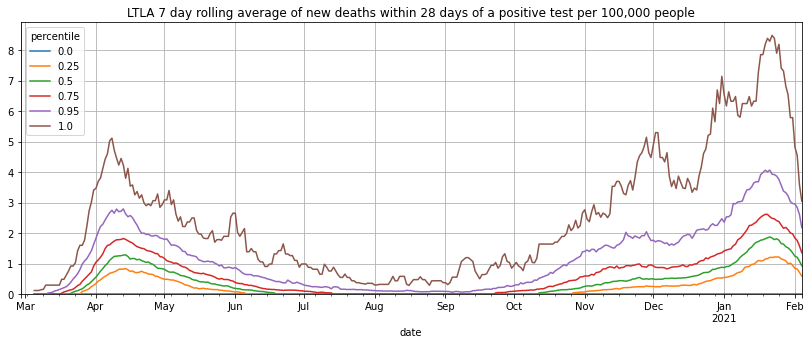

In [6]:
plot_quantiles(Map(s.new_deaths, rolling_days=7).for_area_type(ltla))

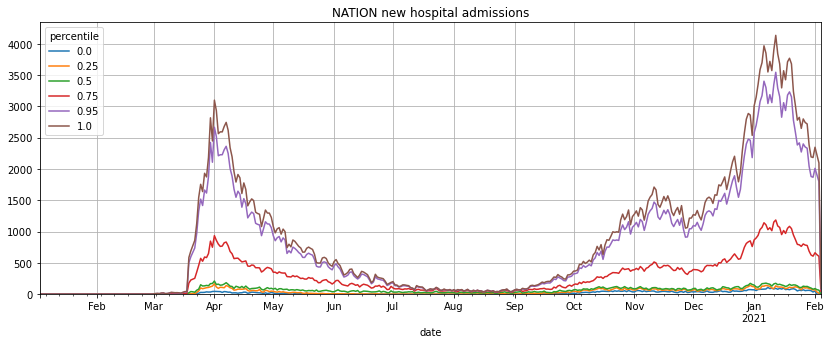

In [13]:
plot_quantiles(Map(s.new_admissions, per_population=None).for_area_type(nation))

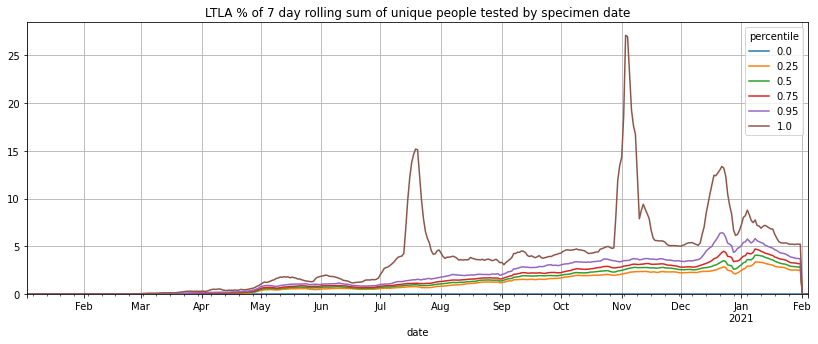

In [3]:
plot_quantiles(Map(s.unique_people_tested_sum, per_population=100).for_area_type(ltla))

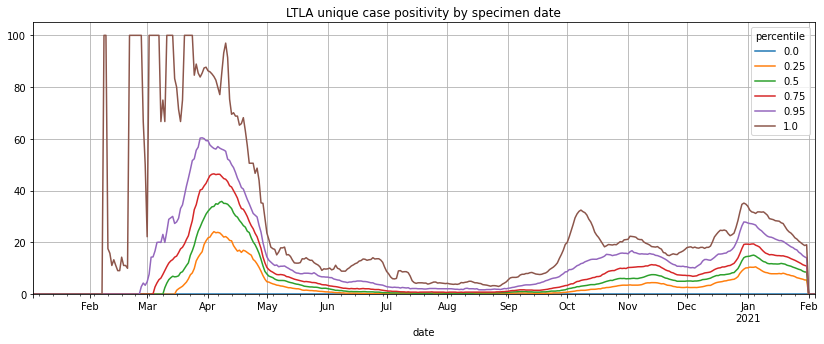

In [16]:
plot_quantiles(Map(s.unique_cases_positivity_sum, per_population=None).for_area_type(ltla))